# Page View Time Series Visualizer from freeCodeCamp

## AJNF

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv")
df.set_index('date', inplace=True)

# Clean data
df= df.loc[(df['value'] >= df['value'].quantile(0.025)) &
           (df['value'] <= df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    
    fig, ax = plt.subplots(figsize=(9,7))
    ax.plot(df.index,df['value'])
    plt.xlabel('Date')
    plt.xticks([53, 237, 418, 602, 783, 967, 1148],
               ['2016-07', '2017-01', '2017-07', '2018-01', '2018-07', '2019-01', '2019-07'],
           rotation=20)  # Set text labels and properties.
    plt.ylabel('Page Views') 
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot

    # Draw bar plot
    bar_data = pd.DataFrame({
    "January": [0, 32785, 58580, 102056],
    "February": [0, 31113, 65679, 105968],
    "March":[0, 29369, 62693, 91214],   
    "April":[0, 30878, 62350, 89368],
    "May":[19432, 34244, 56562, 91439],
    "June":[21875, 43577, 70117, 90435],
    "July":[24109, 65806, 63591, 97236],
    "August":[31049, 47712, 62831, 102717],
    "September":[41476, 47376, 65941, 97268],
    "October":[27398, 7438, 111378, 122802],
    "November":[40448, 57701, 78688, 143166],
    "December":[27832, 8420, 80047, 150733]
        },
    index = ["2016","2017","2018", "2019"]
                        )

    x_years = [2016,2017,2018,2019
              ]
    fig, ax = plt.subplots(figsize=(15,7))
    bar_data.plot(kind='bar', ax=ax)
    plt.rcParams["figure.figsize"] = [10, 6]

    plt.xlabel("Years")
    plt.ylabel("Average Page Views")


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    
    df_dummy = df.copy()
    df_dummy['month'] = pd.to_datetime(df_dummy.index).strftime('%b')
    df_dummy['year'] = pd.to_datetime(df_dummy.index).strftime('%Y')
    
    
    months_in_year = ['January',
     'February',
     'March',
     'April',
     'May',
     'June',
     'July',
     'August',
     'September',
     'October',
     'November',
     'December']
    
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 3), sharey=True)

    sns.boxplot(x="year", y="value", data=df_dummy, ax = ax1)

    sns.boxplot(x="month", y="value", data=df_dummy, ax = ax2)

    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Years')
    ax1.set_ylabel("Page Views")
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Months')
    ax2.set_xticks(ticks = np.arange(len(months_in_year)), labels = months_in_year, rotation = 45)
    ax2.set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


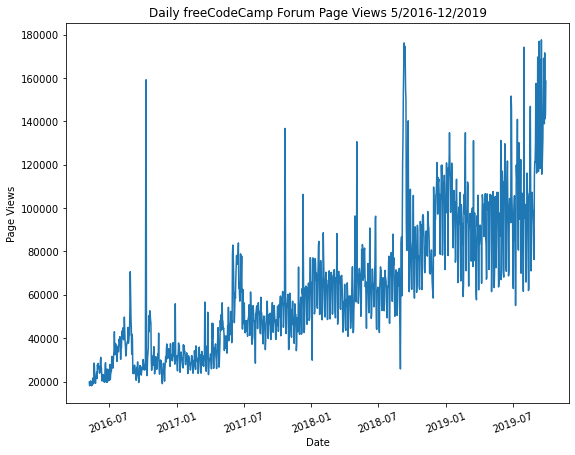

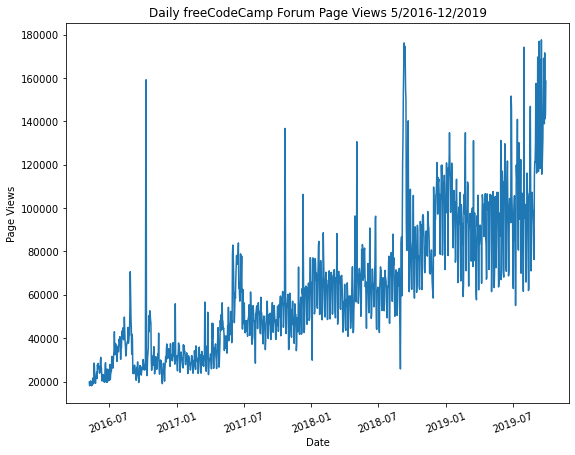

In [24]:
draw_line_plot()

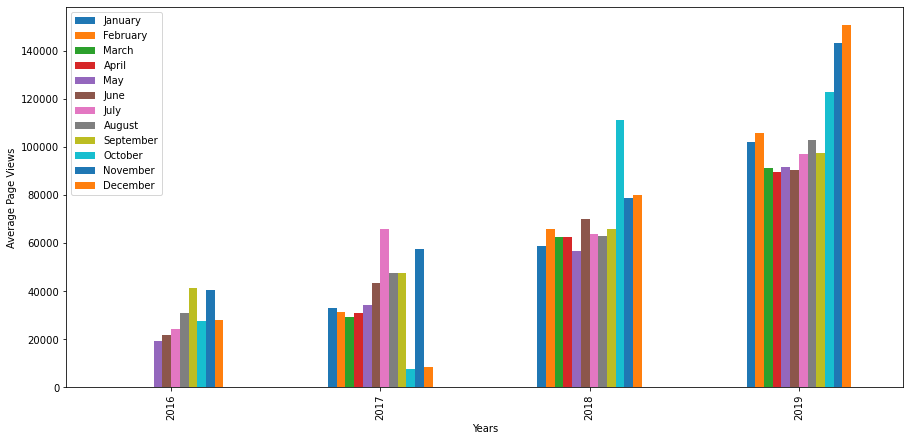

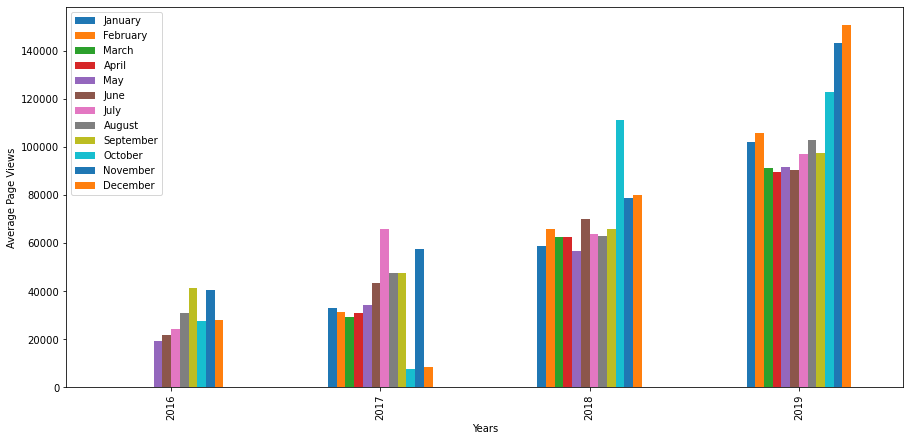

In [25]:
draw_bar_plot()

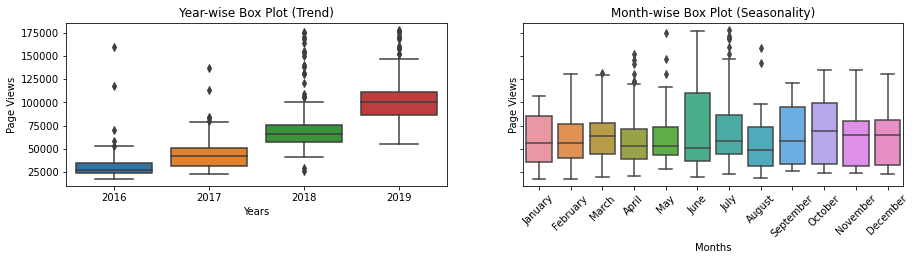

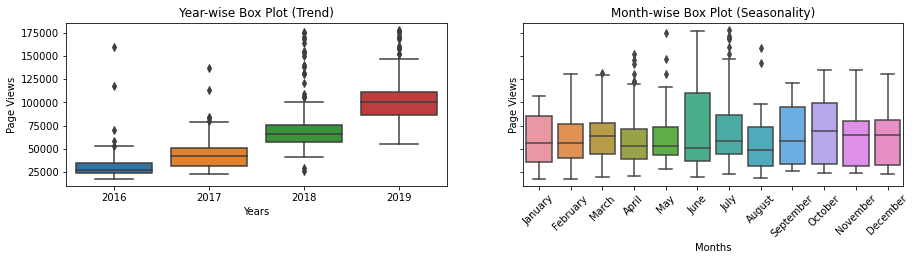

In [23]:
draw_box_plot()